# 데이터 확인

In [27]:
import pandas as pd

data = pd.read_csv('./dataset/ch7-1.csv')
print(data.info())
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   egg_weight  300 non-null    int64
 1   acc_food    300 non-null    int64
 2   weight      300 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB
None

   egg_weight  acc_food  weight
0          69     10602    4128
1          76     10640    4104
2          76     10898    4119
3          71     10384    4127
4          71     10709    4112


In [28]:
data_corr = data.corr()

data_corr

,egg_weight,acc_food,weight
egg_weight,1.000000,0.944810,0.779895
acc_food,0.944810,1.000000,0.790082
weight,0.779895,0.790082,1.000000


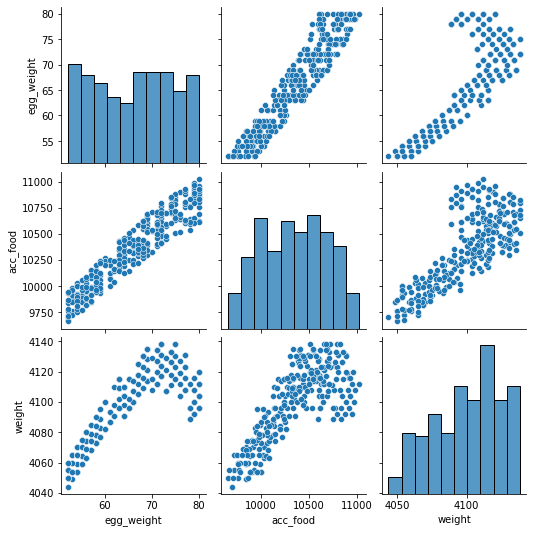

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(data)

# 데이터 분할

In [30]:
x_data = data.iloc[:, 0:2].values
y_data = data.iloc[:, 2].values

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2)

print(f'Train : \n X Shape : {train_x.shape}, \n Y Shape : {train_y.shape}')
print(f'Test : \n X Shape : {test_x.shape}, \n Y Shape : {test_y.shape}')

Train : 
 X Shape : (240, 2), 
 Y Shape : (240,)
Test : 
 X Shape : (60, 2), 
 Y Shape : (60,)


# 신경망 구현

## sklearn

In [31]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor().fit(train_x, train_y)

model_mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [32]:
y_pred_mlp = model_mlp.predict(test_x)
y_pred_mlp

array([3980.65406894, 4189.88926454, 3916.98542957, 4195.1727691 ,
       3989.63703362, 4077.87436478, 4180.24703055, 4240.34878291,
       4143.65626214, 4235.99005347, 4292.39342456, 4159.77156239,
       3995.97680755, 4130.18343339, 3986.0701466 , 4115.65289681,
       4345.49448459, 3985.14609071, 4254.87860025, 4196.49418467,
       4221.8554381 , 4035.60488984, 4071.00573693, 4157.79087751,
       3905.62549918, 4389.87783929, 3885.5473907 , 3946.31057007,
       4262.67272246, 4286.31735835, 4282.08969217, 3931.78003349,
       4211.28806936, 3989.10889894, 4081.30903832, 4028.07591382,
       4083.42301553, 3899.54943298, 4152.63958643, 4004.82719914,
       3933.62958374, 4320.13256762, 4286.84549304, 4195.43719606,
       4292.39342456, 4334.92700941, 3941.81926754, 3971.80403698,
       3944.32880634, 4344.30585273, 4223.83720183, 4236.6496824 ,
       4252.63384803, 4074.83705091, 4099.2731696 , 4059.64616617,
       4115.91696416, 4036.39709186, 4062.02349149, 4062.02349

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

RMSE = mean_squared_error(test_y, y_pred_mlp, squared=False)
MAE = mean_absolute_error(test_y, y_pred_mlp)
R2 = r2_score(test_y, y_pred_mlp)

print(f'RMSE : {RMSE}, MAE : {MAE}, R2 : {R2}')

RMSE : 120.56826085535765, MAE : 101.253269420438, R2 : -28.745054379254707


## H2O 사용



In [36]:
import h2o

## 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Seoul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_hangdori_p693c3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### h2o 전용 데이터셋 생성

In [38]:
train, test = train_test_split(data, test_size=0.2)
print(train.head())

     egg_weight  acc_food  weight
207          72     10538    4117
292          75     10646    4123
94           79     10949    4092
76           80     10848    4104
86           79     10918    4116


In [39]:
hf_train = h2o.H2OFrame(train)
hf_test = h2o.H2OFrame(test)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### h2o 데이터셋 구조확인
    - hf_df.structure()  => info()와 유사

In [40]:
hf_train.structure()

H2OFrame: 'Key_Frame__upload_80e273c2e0998e0040a4cb237e454cd0.hex' 
Dimensions: 240 obs. of 3 variables
$ egg_weight :  num 72 75 79 80 79 75 65 71 60 67
$ acc_food   :  num 10538 10646 10949 10848 10918 10826 10414 10709 10204 10327
$ weight     :  num 4117 4123 4092 4104 4116 4138 4102 4112 4082 4125


In [42]:
hf_test.structure()

H2OFrame: 'Key_Frame__upload_b69fb57fba5be3ba16adbb2ce7654782.hex' 
Dimensions: 60 obs. of 3 variables
$ egg_weight :  num 58 67 79 72 69 67 68 69 73 80
$ acc_food   :  num 10036 10287 10870 10408 10657 10327 10436 10685 10477 10832
$ weight     :  num 4090 4105 4092 4124 4121 4125 4130 4135 4107 4096


In [43]:
# 딥러닝 구현을 위한 함수
from h2o.estimators import H2ODeepLearningEstimator

model_h2o = H2ODeepLearningEstimator().train(x=['egg_weight', 'acc_food'], y='weight', training_frame=hf_train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


In [44]:
# 모델 구조확인

model_h2o

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1658125312979_1


Status of Neuron Layers: predicting weight, regression, gaussian distribution, Quadratic loss, 41,001 weights/biases, 488.6 KB, 2,400 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,2,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.007808,0.005772,0.0,0.001605,0.112567,0.471051,0.024306
2,,3,200,Rectifier,0.0,0.0,0.0,0.065194,0.170565,0.0,-0.004545,0.070042,0.990706,0.00899
3,,4,1,Linear,,0.0,0.0,0.005501,0.069537,0.0,-0.005267,0.079762,0.001711,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 102.05106076364021
RMSE: 10.102032506562242
MAE: 7.886456469832276
RMSLE: 0.002459934265962605
Mean Residual Deviance: 102.05106076364021

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-07-18 15:26:28,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-07-18 15:26:29,0.951 sec,551 obs/sec,1.0,1,240.0,14.403507,207.461002,11.549239,0.639061
2,,2022-07-18 15:26:29,1.283 sec,3265 obs/sec,10.0,10,2400.0,10.102033,102.051061,7.886456,0.822452



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,acc_food,1.000000,1.000000,0.510227
1,egg_weight,0.959912,0.959912,0.489773


In [45]:
## 모델 성능

model_h2o.model_performance()


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 102.05106076364021
RMSE: 10.102032506562242
MAE: 7.886456469832276
RMSLE: 0.002459934265962605
Mean Residual Deviance: 102.05106076364021


In [46]:
hf_test

egg_weight,acc_food,weight
58,10036,4090
67,10287,4105
79,10870,4092
72,10408,4124
69,10657,4121
67,10327,4125
68,10436,4130
69,10685,4135
73,10477,4107
80,10832,4096


In [48]:
## 예측 결과 확인

y_pred_h2o = model_h2o.predict(hf_test)
# y_pred_h2o.head()

hf_result = hf_test.cbind(y_pred_h2o)
hf_result.head(10)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


egg_weight,acc_food,weight,predict
58,10036,4090,4079.53
67,10287,4105,4110.14
79,10870,4092,4121.12
72,10408,4124,4120.96
69,10657,4121,4124.69
67,10327,4125,4112.16
68,10436,4130,4119.44
69,10685,4135,4124.98
73,10477,4107,4121.32
80,10832,4096,4120.33
